<div style='float:left'>
<img style="-webkit-user-select: none" src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/marca_UOC_web.jpg">
<h1>
Mejora de la calidad de un árbol<br> de decisión mediante <br> PCA y/o SVD
</h1>
</div>
<div style='float:right'>
<table align="right">
<tr>
<th></th>
<th>Master UOC en Inteligencia de Negocio</th>
  </tr>
  <tr>
   <td>Asignatura</td>
    <td>B2.332-M5  Modelos Avanzados de clasificación, relación y predicción</td>
  </tr>
  <tr>
    <td>Consultor</td>
    <td>Ramon Caihuelas</td>
  </tr>
   <tr>
    <td>Estudiante</td>
    <td>Nombre estudiante</td>
  </tr>
   <tr>
    <td>Fecha entrega</td>
    <td>01/04/2017</td>
  </tr>
</table>
</div>
<div style='clear:both'></div>



## Introducción:

En esta PEC el estudiante deberá, a partir de un conjunto de datos, analizar sus principales características mediante el uso de descriptores estadísticos y gráficos, reducir su dimensionalidad y extraer nuevas características mediante el uso de PCA y SVD que permitan mejorar la eficiencia de los árboles de decisión utilizados para resolver el problema propuesto.

El juego de datos a trabajar es libre y a título de ejemplo proponemos el siguiente:
[Machine Learning Repository: Cáncer de pecho](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

#### Entregable
La práctica a entregar por parte del estudiante será este mismo documento con, los puntos del siguiente índice desarrollados:

En todo el proceso es necesario indicar el objetivo de las acciones tomadas y explicar los resultados obtenidos, detallando los pasos efectuados para tal fin.

Deberá quedar explícito que se ha trabajado y entendido el material didáctico y que sois capaces de realizar tareas de laboratorio de analítica de datos con los algoritmos estudiados, tomando las decisiones adecuadas en cada caso.

Para guiaros en el proceso de elaboración de la PEC, veréis que algunos de los puntos ya contienen una propuesta de contenido, de modo que se espera que la completéis con vuestras aportaciones. 

La práctica en sí se divide en dos partes A y B:

###### A. Completar el estudio de predicción de cáncer de pecho:
     1. Carga de datos y tareas de preprocesado si es necesario. Alternativamente podeis escoger un set de datos siempre que tenga una dimensionalidad en registros y variables y se ajuste al objetivo de la PEC 
     2. Trabajar la calidad de los datos: limpieza, categorización, normalización, dimensionalidad...
     3. Estudiar correlaciones y generar nuevas variables si es necesario.
     4. Estudio visual de la información contenida en los datos (distribuciones, poner en relación variables...).
     5. Elaboración de un primer modelo clasificador basado en árboles de decisión.
     6. Extraer la calidad del modelo generado.
     7. Interpretar la información obtenida del modelo generado: variables más relevantes, etc.
     8. Mejorar el juego de datos mediante los algoritmos PCA y/o SVD estudiados en A1 si procede.
     9. Construid árboles de decisión con la nuevas características y evaluar los resultados.
     10. Conclusiones.
     11. Fuentes consultadas.

###### B. Repetir el estudio con un nuevo juego de datos:

Con el objetivo de mejorar la operativa de los vuelos, se pide que elaboréis un modelo para predecir cuando un vuelo va a retrasarse. Con este modelo las aerolíneas podrán determinar cuando se producen algunos patrones que llevan a un vuelo a retrasarse.

Aclarar que podéis eliminar variables y registros si consideráis que puede facilitar vuestro trabajo. Comentar también que en este caso hay que construir el campo clasificador en función de algún criterio que nos permita predecir el retraso de los vuelos. En este sentido se valorará la estrategia y el planteamiento que se haga.

El juego de datos es: 
[Predicción en retrasos de vuelos](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time)

    



# A. Estudio de predicción de cáncer de pecho

## A.1. Carga de datos y pre-procesado

### Instalar los packages necesarios en caso de no haberlo hecho anteriormente

In [46]:
if(!require(car)){
    install.packages('car',repos='http://cran.es.r-project.org')
    require(car)
}
if(!require(C50)){
    install.packages('C50',repos='http://cran.es.r-project.org')
    require(C50)
}
if(!require(gmodels)){
    install.packages('gmodels',repos='http://cran.es.r-project.org')
    require(gmodels)
}
set.seed(606);

### Leer el conjunto de datos original desde su URL en el repositorio UCI Machine Learning

In [47]:
wdbc=read.table(
    url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"), 
    sep=",", header=FALSE)

### Obtener las dimensiones (N y d) del conjunto de datos

In [48]:
head(wdbc)
dim(wdbc)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2
6,1017122,8,10,10,8,7,10,9,7,1,4


[1] 699  11


## A.2. Trabajar la calidad de los datos

### Recodificar los '?' por NA y quedarse solo con los registros completos

In [49]:
wdbc$V7=as.numeric(recode(wdbc$V7, "'?'=NA"))

y=wdbc[complete.cases(wdbc),]

head(y)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,2,3,2,1,2
3,1015425,3,1,1,1,2,3,3,1,1,2
4,1016277,6,8,8,1,3,5,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2
6,1017122,8,10,10,8,7,2,9,7,1,4


Normalizamos el juego de datos para evitar que unas variables tengan más relevancia que otras, 
simplemente por el hecho de estar expresadas en magnitudes más grandes

In [50]:
x <- as.data.frame(cbind(y[,1],scale(y[,2:11])))
class(x)

[1] "data.frame"

### Particionar el conjunto de entrada en dos (training y test set), según la regla del 2/3

In [51]:
N=dim(x)[1]
all=seq(1,N)

# seleccionar 2/3 al azar

train=sort(sample(N,N*2/3.0))
test=setdiff(all,train)

xtrain=x[train,]
xtest=x[test,]

In [52]:
### Revisar que haya una representación parecida variable clasificadora en el conjunto de entreno y test

In [53]:
prop.table(table(xtrain$V11))
prop.table(table(xtest$V11))


-0.733144027377551   1.36199141487712 
         0.6549451          0.3450549 


-0.733144027377551   1.36199141487712 
         0.6403509          0.3596491 

## A.3. Estudiar correlaciones y generar nuevas variables si es necesario

## A.4. Estudio visual de la información

## A.5. Elaboración de un primer modelo

### Crear un primer árbol usando todos los parámetros por defecto y dibujarlo


Call:
C5.0.default(x = xtrain[, c(2:10)], y = as.factor(xtrain$V11))

Classification Tree
Number of samples: 455 
Number of predictors: 9 

Tree size: 4 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = xtrain[, c(2:10)], y = as.factor(xtrain$V11))


C5.0 [Release 2.07 GPL Edition]  	Thu Apr 06 22:06:07 2017
-------------------------------

Class specified by attribute `outcome'

Read 455 cases (10 attributes) from undefined.data

Decision tree:

V3 <= -0.3754489: -0.733144027377551 (284/7)
V3 > -0.3754489:
:...V7 > -0.5655993: 1.36199141487712 (151/8)
    V7 <= -0.5655993:
    :...V3 <= 0.6032977: -0.733144027377551 (14/1)
        V3 > 0.6032977: 1.36199141487712 (6)


Evaluation on training data (455 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     4   16( 3.5%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   290     8    (a): class -0.733144027377551
	     8   149    (b): class 1.36199141487712


	Attribute usage:

	100.00%	V3
	 37.58%	V7


Time: 0.0 secs


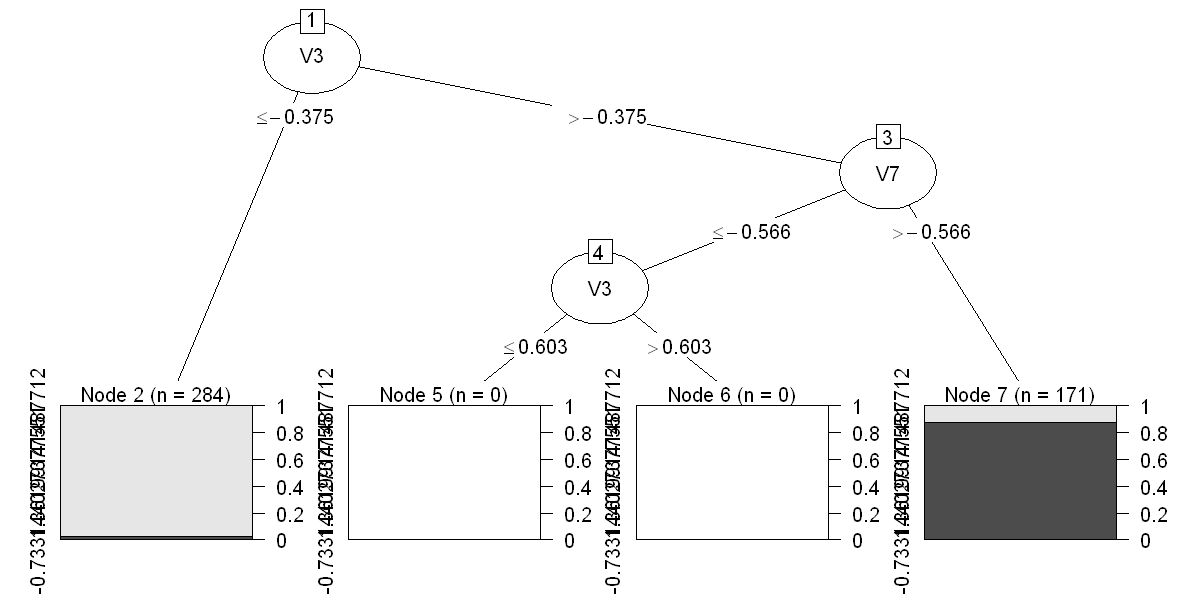

In [54]:
model1 <- C50::C5.0(xtrain[,c(2:10)],as.factor(xtrain$V11))
model1
summary(model1)
options(repr.plot.width=10, repr.plot.height=5)
plot(model1)

## A.6. Evaluar el árbol creado

Evaluamos el árbol creado mediante la matriz de confusión para cada subconjunto

In [55]:
V11_pred <- predict(model1, xtest)
CrossTable(xtest$V11,V11_pred,prop.chisq=FALSE,prop.c=FALSE,prop.r=FALSE,dnn = c('actual V11','predicted V11'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  228 

 
                   | predicted V11 
        actual V11 | -0.733144027377551 |   1.36199141487712 |          Row Total | 
-------------------|--------------------|--------------------|--------------------|
-0.733144027377551 |                137 |                  9 |                146 | 
                   |              0.601 |              0.039 |                    | 
-------------------|--------------------|--------------------|--------------------|
  1.36199141487712 |                  7 |                 75 |                 82 | 
                   |              0.031 |              0.329 |                    | 
-------------------|--------------------|--------------------|--------------------|
      Column Total |                144 |                 84 |                228 | 
-------------------|---------

## A.7. Interpretar la información obtenida del modelo

El error del árbol es del 0,07. Solo 16 casos clasifican incorrectamente. Veamos si es mejorable con la técnica de SVD   

## A.8. Mejorar el modelo generado aplicando SVD o PCA.

Utilizamos SVD para extraer características

In [56]:
TipoCancer <- xtrain[,11]
VarCancer <- xtrain[,2:10]

svdVarCancer <- svd(VarCancer)
svdVarCancerT <- svd(xtest[,2:10])


### Porcentaje de la varianza acumulada explicada 

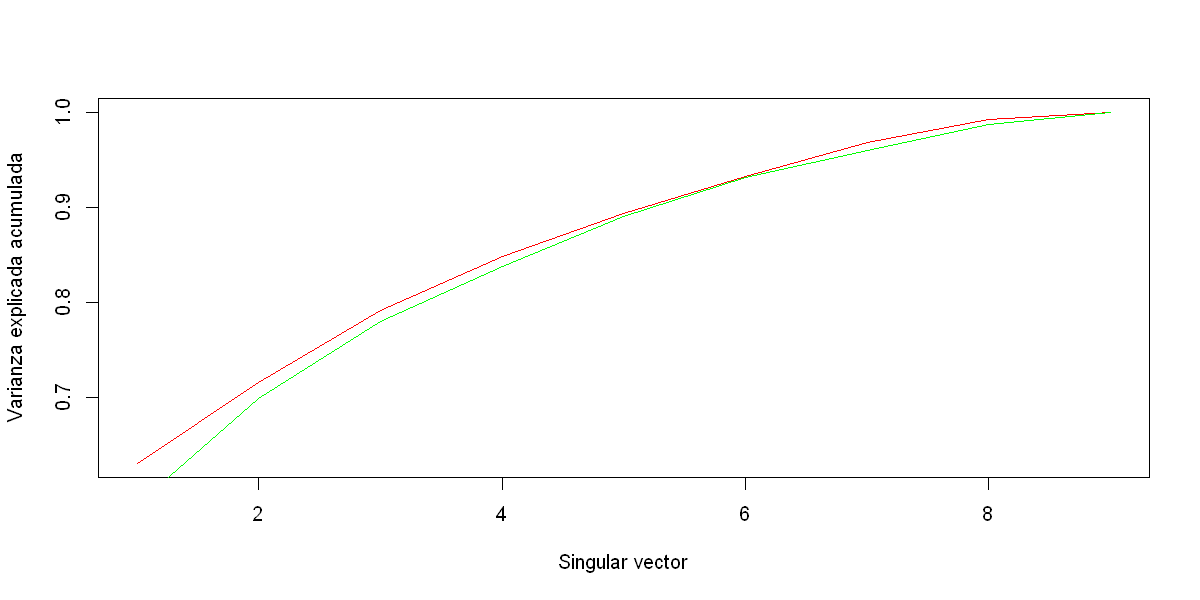

In [57]:
plot(cumsum(svdVarCancer$d^2/sum(svdVarCancer$d^2)),type="l",col="red",xlab="Singular vector",ylab="Varianza explicada acumulada")
lines(cumsum(svdVarCancerT$d^2/sum(svdVarCancerT$d^2)),col="green")



### Añadir una nueva variable C1 a los datos usando el primer SVD que acumula el 32% de varianza

In [58]:
xtrain$C1=svdVarCancer$u[,1]
xtest$C1=svdVarCancerT$u[,1]

## A.9. Construir un nuevo árbol con las nuevas características y evaluar los resultados

Creamos un segundo árbol con la nueva variable usando todos los parámetros por defecto y dibujarlo


Call:
C5.0.default(x = xtrain[, c(2:10, 12)], y = as.factor(xtrain$V11))

Classification Tree
Number of samples: 455 
Number of predictors: 10 

Tree size: 2 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = xtrain[, c(2:10, 12)], y = as.factor(xtrain$V11))


C5.0 [Release 2.07 GPL Edition]  	Thu Apr 06 22:06:08 2017
-------------------------------

Class specified by attribute `outcome'

Read 455 cases (11 attributes) from undefined.data

Decision tree:

C1 <= 0.004016426: 1.36199141487712 (164/8)
C1 > 0.004016426: -0.733144027377551 (291/1)


Evaluation on training data (455 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     2    9( 2.0%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   290     8    (a): class -0.733144027377551
	     1   156    (b): class 1.36199141487712


	Attribute usage:

	100.00%	C1


Time: 0.0 secs


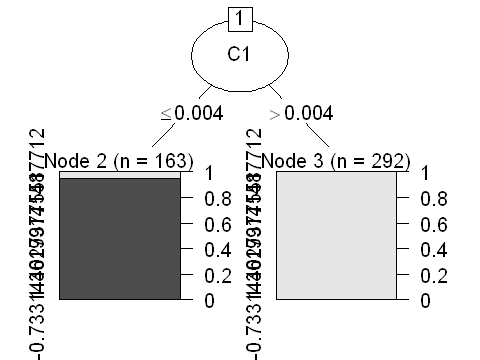

In [59]:
model2 <- C50::C5.0(xtrain[,c(2:10,12)],as.factor(xtrain$V11))
model2
summary(model2)
options(repr.plot.width=4, repr.plot.height=3)
plot(model2)


Observar que para la creación el árbol solo se ha usado la variable que corresponde con el componente 1. El resto de variables se ha descartado.

### Evaluar el árbol creado mediante la matriz de confusión para cada subconjunto

In [60]:
V11_pred <- predict(model2, xtest)
CrossTable(xtest$V11,V11_pred,prop.chisq=FALSE,prop.c=FALSE,prop.r=FALSE,dnn = c('actual V11','predicted V11'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  228 

 
                   | predicted V11 
        actual V11 | -0.733144027377551 |   1.36199141487712 |          Row Total | 
-------------------|--------------------|--------------------|--------------------|
-0.733144027377551 |                139 |                  7 |                146 | 
                   |              0.610 |              0.031 |                    | 
-------------------|--------------------|--------------------|--------------------|
  1.36199141487712 |                  0 |                 82 |                 82 | 
                   |              0.000 |              0.360 |                    | 
-------------------|--------------------|--------------------|--------------------|
      Column Total |                139 |                 89 |                228 | 
-------------------|---------

Tenemos una tasa del 0,03 de error en clasificación. Ha disminuido. Hemos logrado reducir las clasificaciones erróneas de tumor maligno a 0 reduciéndose la misma tasa de falsos positivos de 9 a 7.

## A.10. Conclusiones

## A.11. Fuentes consultadas

# B. Estudio para la predicción de retrasos en vuelos